<div style="background-color: #4CAF50; color: white; padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h1 style="margin: 0 auto; font-size: 30px; font-weight: bold; font-family: Helvetica">การวิเคราะห์ข้อมูลถดถอยเชิงเส้นพหุคูณ (Multiple Linear Regression)</h1>
</div>

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">เครื่องมือที่จะใช้ใน Lab นี้:</h1>

In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# นำเข้าไลบรารี numpy โดยตั้งชื่อว่า np
import numpy as np
# นำเข้าไลบรารี matplotlib โดยตั้งชื่อว่า plt
import matplotlib.pyplot as plt
# นำเข้าไลบรารี pandas โดยตั้งชื่อว่า pd
import pandas as pd
# นำเข้าไลบรารี seaborn โดยตั้งชื่อว่า sns
import seaborn as sns

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">1. สำรวจและวิเคราะห์ข้อมูลเบื้องต้น (Exploratory Data Analysis: EDA)</h1>

<h1 style="font-size: 18px;">1.1 นำข้อมูลเข้า</h1>

In [5]:
data = pd.read_csv('USA_Housing.csv') # อ่านไฟล์ csv ชื่อ 'USA_Housing.csv' เราจะได้ตารางของข้อมูล (dataframe) เก็บไว้ในตัวแปรชื่อ data
data # แสดงผล dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


<h1 style="font-size: 18px;">1.2 สำรวจข้อมูล</h1>

In [6]:
data.info() # แสดงรายละเอียดของแต่ละคอลัมน์ใน data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
data.describe().round(2) # แสดงสถิติเบื้องต้นของแต่ละคอลัมน์ใน dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [8]:
# ตรวจสอบข้อมูลที่หายไป
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
# แสดงแถวทื่มีชุดข้อมูลซ้ำกัน
data[data.duplicated(keep=False)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


<h1 style="font-size: 18px;">1.3 คัดเลือกข้อมูล (data cleaning)</h1>

In [10]:
data = data.drop('Address', axis=1) # ลบคอลัมน์ที่ชื่อ 'Address'
data.head() # แสดงผล dataframe 5 แถวแรก

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [11]:
data = data.round(2) # ปัดทศนิยมของค่าที่เป็นตัวเลขใน dataframe ให้เป็นทศนิยม 2 ตำแหน่ง
data.head() # แสดงผล dataframe 5 แถวแรก

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81
4,59982.20,5.04,7.84,4.23,26354.11,630943.49


<h1 style="font-size: 18px;">1.4 ดูความสัมพันธ์ของข้อมูล</h1>

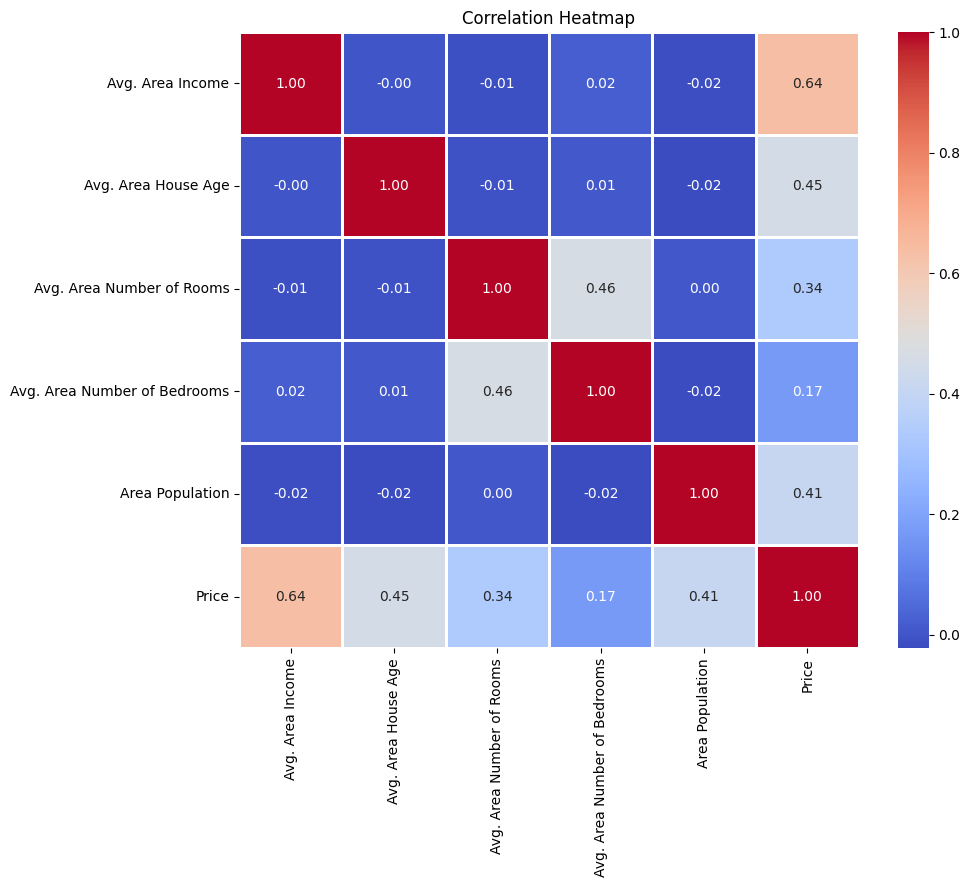

In [12]:
# สร้างกราฟ corelation ของแต่ละคอลัมน์ใน dataframe
corr_matrix = data.corr()  # เรียกดู correlation ของแต่ละคอลัมน์ใน dataframe
plt.figure(figsize=(10, 8)) # กำหนดขนาดของกราฟ
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=2) # สร้างกราฟ correlation matrix 
plt.title('Correlation Heatmap') # ตั้งชื่อกราฟ
plt.show() # แสดงผล

In [13]:
data.corr().Price.sort_values(ascending=False) # แสดงผลคอลัมน์ที่มี correlation กับ 'Price' จากมากไปน้อย

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452575
Area Population                 0.408556
Avg. Area Number of Rooms       0.335651
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">2. ปรับปรุงข้อมูล (Data Preprocessing)</h1>

In [14]:
# นำเข้าไลบรารี sklearn.preprocessing เพื่อเรียกใช้ StandardScaler
from sklearn.preprocessing import StandardScaler
# นำฟังก์ชัน StandardScaler() เก็บไว้ในตัวแปร pre_process
pre_process = StandardScaler()

<h1 style="font-size: 18px;">2.1 แบ่งข้อมูลเป็นส่วน Features และ Label</h1>

In [15]:
# X เป็น Features
X = data.drop('Price', axis=1)
# y เป็น Label
y = data['Price']

In [16]:
X # แสดงผล X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.46,5.68,7.01,4.09,23086.80
1,79248.64,6.00,6.73,3.09,40173.07
2,61287.07,5.87,8.51,5.13,36882.16
3,63345.24,7.19,5.59,3.26,34310.24
4,59982.20,5.04,7.84,4.23,26354.11
...,...,...,...,...,...
4995,60567.94,7.83,6.14,3.46,22837.36
4996,78491.28,7.00,6.58,4.02,25616.12
4997,63390.69,7.25,4.81,2.13,33266.15
4998,68001.33,5.53,7.13,5.44,42625.62


In [17]:
y # แสดงผล y

0       1059033.56
1       1505890.91
2       1058987.99
3       1260616.81
4        630943.49
           ...    
4995    1060193.79
4996    1482617.73
4997    1030729.58
4998    1198656.87
4999    1298950.48
Name: Price, Length: 5000, dtype: float64

<h1 style="font-size: 18px;">2.2 ทำการ Standardize ข้อมูลส่วน Features</h1>


In [18]:
X = pre_process.fit_transform(X) # ปรับช่วงของ Features ทั้งหมด
X # แสดงผล X

array([[ 1.02865983, -0.29987546,  0.02210404,  0.08806222, -1.31759873],
       [ 1.00080752,  0.02292053, -0.25630941, -0.72230146,  0.40399922],
       [-0.68462889, -0.10821534,  1.51360465,  0.93084045,  0.07240995],
       ...,
       [-0.48723424,  1.2838424 , -2.16543019, -1.50025059, -0.29193613],
       [-0.05459163, -0.45118609,  0.14142409,  1.18205319,  0.65111607],
       [-0.28831289,  0.01283316, -0.19664938,  0.07185495,  1.04162425]])

In [19]:
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [20]:
y = np.array(y)  # เปลี่ยน type ของ y ให้เป็น array
print(type(X)) ; print(type(y)) # แสดง type ของ X และ y

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">3. แบ่งส่วนข้อมูล (Train-Test Split)</h1>

In [21]:
# นำเข้าไลบรารี sklearn.model_selection เพื่อเรียกใช้ train_test_split
from sklearn.model_selection import train_test_split

In [22]:
# แบ่งส่วนข้อมูล X เป็น X_train, X_test และ y เป็น y_train, y_test โดยมีอัตราส่วนแบ่งเป็น 0.8:0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [23]:
print('length of X_train:',len(X_train),', length of X_test:', len(X_test)) # แสดงจำนวนข้อมูลใน X_train และ X_test

length of X_train: 4000 , length of X_test: 1000


In [24]:
# หรืออีกวิธีหนึ่ง เราสามารถดู shape ของข้อมูลที่เราแบ่งได้ โดยใช้คำสั่ง .shape 
print('shape of X_train:', X_train.shape)   # ดู shape ของ X_train
print('shape of X_test:', X_test.shape)     # ดู shape ของ X_test
print('shape of y_train:', y_train.shape)   # ดู shape ของ y_train
print('shape of y_test:', y_test.shape)     # ดู shape ของ y_test

shape of X_train: (4000, 5)
shape of X_test: (1000, 5)
shape of y_train: (4000,)
shape of y_test: (1000,)


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">4. Multiple Linear Regression model</h1>

<h1 style=" font-size: 18px;"">4.1 สมการทั่วไปของ Linear Regression:</h1>

<div style="font-size: 24px;">

$$Y \approx w_1 \cdot X_1 + w_2 \cdot X_2 + \dots + w_n \cdot X_n + b$$

</div>

โดยที่:
- $Y$ คือตัวแปรตาม (Dependent Variable) ซึ่งเป็นผลลัพธ์หรือค่าที่เราต้องการทำนายหรือวัด
- $X_1, X_2, ... , X_n $ คือตัวแปรอิสระ (Independent Variable) ตัวที่ 1 ถึง n ซึ่งเป็นข้อมูลหรือตัวแปรที่มีผลต่อ $Y$ และที่เราใช้ในการทำนายหรือวัด $Y$
- $w_1, w_2, ... , w_n$ หรืออาจเรียกว่า weight คือพารามิเตอร์หรือความชัน (Coefficient) ของ X ตัวที่ 1 ถึง n ซึ่งแสดงถึงความสัมพันธ์ระหว่าง $X$ และ $Y$ และบ่งบอกว่าการเปลี่ยนแปลงใน $X$ มีผลต่อ $Y$ อย่างไร
- $b$ หรืออาจเรียกว่า bias คือค่าคงที่ (Intercept) ซึ่งคือค่าของ $Y$ เมื่อ $X$ มีค่าเป็นศูนย์ หรือค่าตัดแกน $Y$ ที่ $X$ เท่ากับศูนย์

<h1 style=" font-size: 18px;"">4.2 Gradient Descent ใน Multiple Linear Regression</h1>

เช่นเดิม ค่า Cost ที่เรานั้นใช้ในการวัดผลยังเป็น Mean Square Error (MSE) อยู่ ซึ่งสมการในรูปแบบทั่วไปจะเป็นดังนี้:

<div style="font-size: 24px;">

$$ J(w,b) = \text{MSE} = \frac{1}{2m} \sum_{i=0}^{m-1} \left( \hat{Y}_i - Y_i \right)^2 $$

</div>

เมื่อ:
- $m$ คือจำนวนตัวอย่างในชุดข้อมูล
- $Y_i$ คือค่าจริงที่ต้องการทำนาย
- $\hat{Y}_i$ คือค่าที่ได้จากการทำนายด้วยโมเดล ซึ่งสามารถเขียนได้เป็น

<div style="font-size: 24px;">

$$ \hat{Y}_i = w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b $$

</div>

โดยที่:
- $ X_{i1}, X_{i2}, \dots, X_{in} $ เป็นค่าตัวแปรต้นของตัวอย่างที่ $ i $
- $ w_0, w_1, \dots, w_n $ เป็น coefficients ของโมเดล
- $ b $ คือค่าคงที่ (Intercept)

การทำ Gradient Descent คือการอัพเดท $ w_1, \dots, w_n $ และ $ b $ ให้มีค่าเหมาะสมกับชุดข้อมูลมากที่สุด สามารถทำได้ด้วยสมการดังนี้

ทำซ้ำจนกว่าจะลู่เข้า:

<div style="font-size: 24px;">

$$
\begin{align*}
w_1 &:= w_1 - \alpha \frac{\partial J(w_1,b)}{\partial w_1} \\
w_2 &:= w_2 - \alpha \frac{\partial J(w_2,b)}{\partial w_2} \\
\vdots \\
w_n &:= w_n - \alpha \frac{\partial J(w_n,b)}{\partial w_n} \\
b &:= b - \alpha \frac{\partial J(w,b)}{\partial b} \\
\end{align*}
$$

</div>

โดยมีสมการ gradient สำหรับ $ w_1 $ และ $ w_2 $ ดังนี้:

<div style="font-size: 24px;">

$$
\frac{\partial \text{J(w,b)}}{\partial w_1} = \frac{1}{m} \sum_{i=0}^{m-1} X_{i1} \left( \left(w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b \right) - Y_i \right)
$$

$$
\frac{\partial \text{J(w,b)}}{\partial w_2} = \frac{1}{m} \sum_{i=0}^{m-1} X_{i2} \left( \left(w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b\right) - Y_i \right)
$$

</div>

และเราสามารถคำนวณ gradient สำหรับ $ w_3, \dots, w_n $ ได้เช่นกัน

และมีสมการ gradient สำหรับ $ b $ ดังนี้:

<div style="font-size: 24px;">

$$
\frac{\partial \text{J(w,b)}}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left( \left(w_1 X_{i1} + w_2 X_{i2} + \dots + w_n X_{in} + b \right) - Y_i \right)
$$

</div>

In [25]:
learning_rate = 0.01                            # กำหนดค่า learning rate เก็บไว้ในตัวแปร alpha
num_iterations = 10000                          #  กำหนดจำนวนครั้งในการทำ Gradient Descent เก็บไว้ในตัวแปร num_iterations
m = len(X_train)                                # กำหนดจำนวนข้อมูล เก็บไว้ในตัวแปร m
w = np.array([0.0, 0.0, 0.0, 0.0, 0.0])         # กำหนดค่าเริ่มต้นของ weights โดยจะให้เป็น 0 ในทุกฟีเจอร์ก่อน
b = 0                                           # กำหนดค่าเริ่มต้นของ bias โดยจะให้เป็น 0

# Gradient descent
for iteration in range(num_iterations):
    # คำนวณค่าทำนาย
    y_pred = np.dot(X_train, w) + b

    # คำนวณ gradients
    gradient = (1.0 / len(y_train)) * np.dot(X_train.T, (y_pred - y_train))

    # อัพเดทค่า w และ b
    w -= learning_rate * gradient
    b -= learning_rate * np.mean(y_pred - y_train)

    # คำนวณค่า Cost ใหม่
    mse = (1 / (2 * m)) * ((y_pred - y_train) ** 2).sum()
    w_str = ", ".join([f"{weight:.2f}" for weight in w])
    print(f"รอบที่ {iteration + 1}: w = [{w_str}], b = {b:.2f}, MSE = {mse:.2f}")

print()
# หลังจากทำ Gradient Descent ครบทุก iterations แล้ว ให้สรุปผล w,b สุดท้าย
print("ค่า w สุดท้าย:", w, ', ค่า b สุดท้าย:', b, ', ค่า MSE สุดท้าย:', mse)

รอบที่ 1: w = [2282.92, 1544.75, 1079.88, 631.22, 1368.23], b = 12295.77, MSE = 818452112593.32
รอบที่ 2: w = [4543.08, 3074.86, 2147.39, 1250.75, 2724.36], b = 24468.80, MSE = 802311108958.98
รอบที่ 3: w = [6780.70, 4590.46, 3202.70, 1858.76, 4068.48], b = 36520.31, MSE = 786491089195.10
รอบที่ 4: w = [8996.00, 6091.70, 4245.95, 2455.43, 5400.71], b = 48451.51, MSE = 770985656677.85
รอบที่ 5: w = [11189.22, 7578.70, 5277.32, 3040.93, 6721.13], b = 60263.62, MSE = 755788542583.54
รอบที่ 6: w = [13360.57, 9051.62, 6296.97, 3615.43, 8029.87], b = 71957.81, MSE = 740893603326.63
รอบที่ 7: w = [15510.27, 10510.57, 7305.04, 4179.09, 9327.01], b = 83535.26, MSE = 726294818049.18
รอบที่ 8: w = [17638.55, 11955.69, 8301.69, 4732.09, 10612.66], b = 94997.14, MSE = 711986286161.00
รอบที่ 9: w = [19745.60, 13387.12, 9287.08, 5274.59, 11886.91], b = 106344.60, MSE = 697962224929.28
รอบที่ 10: w = [21831.66, 14804.97, 10261.35, 5806.74, 13149.87], b = 117578.79, MSE = 684216967116.70
รอบที่ 11: w =

<h1 style="font-size: 18px;">4.3 การทำนายข้อมูลชุดใหม่ (Unseen Data)</h1>

In [26]:
# ทำนายราคาของบ้านจากข้อมูล X_test ด้วยโมเดลที่เราเทรนมาแล้ว
y_pred = np.dot(X_test, w) + b
# คำนวณค่า mse
mse = (1 / (2 * m)) * ((y_pred - y_test) ** 2).sum()
# แสดงผลค่า mse ที่เกิดขึ้น
mse

1261789002.3213036

<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">5. การใช้ Multiple Linear Regression model ด้วย Scikit-Learn Library</h1>

In [27]:
# นำเข้าไลบรารี sklearn.linear_model เพื่อเรียกใช้ Linear Regression Model
from sklearn.linear_model import LinearRegression 

<h1 style="font-size: 18px;">5.1 สร้างโมเดลและเทรนโมเดล</h1>

In [28]:
model = LinearRegression() # สร้างโมเดล Linear Regression โดยเก็บไว้ที่ตัวแปร model

model.fit(X_train, y_train) # เทรนโมเดล หรือ ให้โมเดลเรียนรู้ชุดข้อมูลที่เราป้อนให้ นั่นคือ X_train และ y_train

LinearRegression()

In [29]:
model.coef_ # ค่า w ที่ได้จากการเทรนโมเดล

array([230751.06490331, 163248.3492005 , 120293.20591436,   3016.78561905,
       151544.28604413])

In [30]:
model.intercept_ # ค่า b ที่ได้จากการเทรนโมเดล

1231999.011252326

<h1 style="font-size: 18px;"">5.2 ใช้โมเดลที่เทรนแล้ว ทำนายข้อมูล unseen data อย่าง X_test</h1>

In [31]:
y_pred = model.predict(X_test) # ให้โมเดลทำนายราคาบ้าน โดยพิจารณาจาก Features ทุกตัวที่ป้อนให้
print(y_pred)

[1308905.66932842 1236299.91324988 1243935.1996912  1228398.09805871
 1062319.05964701 1544653.85359179 1093551.52309494  833343.38057016
  788333.10172303 1469713.81278081  671793.65275333 1606229.35031148
 1004706.15396541 1797549.44551684 1288854.4861855  1086397.20623137
 1423497.78891627 1077494.11811651  802611.11678077  931201.38261616
 1135266.08822122  916605.05062984 1489376.309597   1284615.5058069
 1583136.33543692 1133250.16889836 1091225.23025257  974305.4868258
  924277.40218725 1740909.85135097 1285974.57378956 1620994.13765247
 1435449.67931974 1232906.2738576  1485405.8772472  1718493.11098022
 1538433.82503671  777544.59389717 1765069.23393868 1174724.75103652
 1553216.8222345   897344.99310256 1370942.07158675  846597.3264278
 1202232.09366632 1132659.4708918  1362177.29151466 1450077.96669523
 1575318.24896156 1233486.8025643  1484196.46666679 1294433.50242717
 1221587.022835    989524.93369663 1694059.38576739 1823733.99823759
 1137419.62480109 1282117.95889314 13

In [32]:
# เปลี่ยน X_test, y_test และ y_pred เป็น dataframes
X_test_df = pd.DataFrame(X_test, columns=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population'])
y_test_df = pd.DataFrame(y_test, columns=['Actual'])
y_pred_df = pd.DataFrame(y_pred.round(2), columns=['Predicted'])

# รวมทั้ง 3 dataframes เป็น dataframe เดียวกัน
result = pd.concat([X_test_df,y_test_df,y_pred_df],axis=1)
result[['Actual', 'Predicted']]

,Actual,Predicted
0,1339096.08,1308905.67
1,1251794.18,1236299.91
2,1340094.97,1243935.20
3,1431507.62,1228398.10
4,1042373.52,1062319.06
...,...,...
995,1107031.25,1042629.76
996,1405505.24,1318431.70
997,1924155.58,1870142.69
998,1571253.53,1663963.81


<h1 style="font-size: 25px; font-weight: bold; font-family: Helvetica">6. การวัดผลโมเดล (Model Evaluation)</h1>

<h1 style="font-size: 18px; font-weight: bold;">6.1 Mean Squared Error (MSE) - ค่าเฉลี่ยความคลาดเคลื่อนกำลังสอง</h1>

- คือการคำนวณค่าเฉลี่ยของความคลาดเคลื่อนกำลังสองระหว่างค่าที่ทำนายได้และค่าจริง
- ค่า MSE ที่สูงบ่งบอกว่ามีความคลาดเคลื่อนในการทำนายที่มาก
- สูตร: 
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2$$


<h1 style="font-size: 18px; font-weight: bold;">6.2 Mean Absolute Error (MAE) - ค่าเฉลี่ยของความคลาดเคลื่อนแบบสัมบูรณ์</h1>

- คือการคำนวณค่าเฉลี่ยของความคลาดเคลื่อนแบบสัมบูรณ์ระหว่างค่าที่ทำนายได้และค่าจริง
- ค่า MAE ที่สูงบ่งบอกว่ามีความคลาดเคลื่อนในการทำนายที่มาก แต่ต่างจาก MSE ตรงที่ค่าที่ออกมาจะเป็นค่าคลาดเคลื่อนที่แท้จริง
- สูตร: 
$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{true},i} - y_{\text{pred},i}|$$

<h1 style="font-size: 18px; font-weight: bold;">6.3 Mean Absolute Percentage Error (MAPE) - ค่าเฉลี่ยของความคลาดเคลื่อนแบบสัมบูรณ์เป็นเปอร์เซ็นต์</h1>

- คือการคำนวณความคลาดเคลื่อนเป็นเปอร์เซ็นต์ระหว่างค่าที่ทำนายได้และค่าจริง
- ใช้ในกรณีที่ต้องการเปรียบเทียบความคลาดเคลื่อนระหว่างชุดข้อมูลที่มีหน่วยหรือขนาดแตกต่างกัน
- สูตร:
$$\text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_{\text{true},i} - y_{\text{pred},i}}{y_{\text{true},i}} \right|$$

<h1 style="font-size: 18px; font-weight: bold;">6.4 R-squared (R2) score - ค่า R กำลังสอง</h1>

- บ่งบอกถึงสัดส่วนของการแปรผันของตัวแปรตามที่ถูกอธิบายโดยโมเดล
- ค่า R2 ใกล้ 1 บ่งบอกว่าโมเดลมีประสิทธิภาพในการทำนาย ในขณะที่ค่า R2 ใกล้ 0 บ่งบอกว่าโมเดลไม่มีประสิทธิภาพ
- สูตร:
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{true},i} - \bar{y_{\text{true}}})^2}$$


In [33]:
# นำเข้าไลบรารี sklearn.metrics เพื่อเรียกใช้ mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
# คำนวณ Mean Squared Error (MSE)
mse = mean_squared_error(result['Actual'], result['Predicted'])

# คำนวณ Mean Absolute Error (MAE)
mae = mean_absolute_error(result['Actual'], result['Predicted'])

# คำนวณ Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((result['Actual'] - result['Predicted']) / result['Actual'])) * 100

# คำนวณ R-squared (R2) score
r2 = r2_score(result['Actual'], result['Predicted'])

# แสดงผล
print("Mean Squared Error (MSE):", round(mse, 2))
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 2))
print("R-squared (R2) Score:", round(r2, 2))

Mean Squared Error (MSE): 10094312021.89
Mean Absolute Error (MAE): 80905.63
Mean Absolute Percentage Error (MAPE): 7.39
R-squared (R2) Score: 0.92


# Interactive Output สำหรับ Multiple Linear Regression

In [35]:
from ipywidgets import interact

np.random.seed(0)
X1 = np.linspace(0, 10, 100)
X2 = np.linspace(5, 15, 100)
y_true = 3 * X1 + 2 * X2 + 5 + np.random.randn(100) * 2

def plot_3d_linear_regression_and_mse(x1_weight=1.0, x2_weight=1.0, b=0.0):
    y_pred = x1_weight * X1 + x2_weight * X2 + b
    
    mse = np.mean((y_true - y_pred) ** 2)
    
    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(X1, X2, y_true, c='dodgerblue', marker='o', alpha=0.7, label='True Data')
    X1_mesh, X2_mesh = np.meshgrid(X1, X2)
    y_pred_mesh = x1_weight * X1_mesh + x2_weight * X2_mesh + b
    ax1.plot_wireframe(X1_mesh, X2_mesh, y_pred_mesh, color='crimson', alpha=0.5, label='Predicted Plane')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('y')
    ax1.set_title('3D Multiple Linear Regression')
    ax1.legend(loc='best')

    ax2 = fig.add_subplot(122, projection='3d')
    squared_errors = (y_true - y_pred) ** 2
    ax2.scatter(X1, X2, squared_errors, c='purple', marker='o', alpha=0.7, label='Squared Error')
    ax2.axhline(y=mse, color='green', linestyle='--', linewidth=2, label=f'MSE = {mse:.2f}')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('Squared Error')
    ax2.set_title('MSE in 3D')
    ax2.legend(loc='best')

    plt.tight_layout()
    plt.show()

interact(plot_3d_linear_regression_and_mse, x1_weight=(-10.0, 10.0, 0.1), x2_weight=(-10.0, 10.0, 0.1), b=(-10.0, 30.0, 0.1));

interactive(children=(FloatSlider(value=1.0, description='x1_weight', max=10.0, min=-10.0), FloatSlider(value=…